In [2]:
cd ..

/home/mars/src_aiai


In [3]:
import pickle
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from src.visualisation import compare, print_statistics, plot_statistics
from skimage.metrics import structural_similarity, peak_signal_noise_ratio, mean_squared_error

In [6]:
data = "COCO"
ISNR = 30

In [7]:
name_net_post = [
    ("Adjoint", "adjoint", "_sigmoid"),
#     ("Learned Adjoint", "adjoint", "_sigmoid_learned_adjoint"),

#     ("U-net", "unet", "_sigmoid"),
#     ("U-net learned adjoint", "unet", "_sigmoid_learned_adjoint"),
    
#     ("dU-net", "dunet", "_sigmoid"),
#     ("dU-net learned adjoint", "dunet", "_sigmoid_learned_adjoint"),
#     ("dU-net learned grad", "dunet", "_sigmoid_learned_grad"),
#     ("dU-net grad upsample", "dunet", "_sigmoid_upsample_grad"),
#     ("U-net long", "unet", "_sigmoid_long"),
#     ("dU-net dirty", "dunet", "_sigmoid_upsample_grad_dirty"),
    
    ("U-net", "unet", "_sigmoid_same"),
    ("GU-net", "dunet", "_sigmoid_same"),
    ("GU-net sigmoid 2", "dunet", "_sigmoid_same2"),
    ("GU-net linear 2", "dunet", "_linear_same2"),
#     ("U-net small", "unet", "_sigmoid_small"),
#     ("dU-net small", "dunet", "_sigmoid_small"),
#     ("U-net smaller", "unet", "_sigmoid_smaller"),
#     ("dU-net smaller", "dunet", "_sigmoid_smaller"),
    
#     ("Adjoint", "adjoint", "_sigmoid"),

#     ("U-net", "unet", "_linear_report"),
#     ("GU-net", "dunet", "_linear_report"),
]

In [8]:
results = []
results += [(name, "Train", f"./data/processed/{data}/train_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [(name, "Test", f"./data/processed/{data}/test_predict_{net}_{ISNR}dB{post}.npy") for name, net, post in name_net_post]
results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train", "Test"]]
# results += [("Primal Dual", mode, f"./data/processed/{data}/PD_{mode.lower()}_predict_{ISNR}dB.npy") for  mode in ["Train"]]


metrics = [
    ("PSNR", peak_signal_noise_ratio),
    ("SSIM", structural_similarity),
    ("MSE", mean_squared_error)
]
names = set([i[0] for i in results])

In [9]:
statistics = pd.read_csv(f"./results/{data}/statistics.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics.dropna(inplace=True)

In [10]:
print(set(statistics.Method))

{'U-net', 'GU-net linear 2', 'GU-net', 'GU-net sigmoid 2', 'Primal Dual', 'Adjoint'}


In [11]:
# statistics = statistics[statistics.Set == "Train"]
# from src.visualisation import results_and_metrics
# name_net_post, results, metrics = results_and_metrics("COCO", 30)
# results = [ results[0], results[2], results[4], results[-1]]

In [12]:
statistics = statistics[[ statistics.Method.iloc[i] in names  for i in range(len(statistics))] ]

In [13]:
sns.set_style("whitegrid")
statistics.Method[statistics.Method == "Adjoint"] = "Pseudo-inverse"

Name                                    |PSNR                |SSIM                |MSE                 |
GU-net_Test                             |  20.257 \pm   2.888|   0.689 \pm   0.121|   0.011 \pm   0.007|
GU-net_Train                            |  20.336 \pm   3.122|   0.694 \pm   0.122|   0.011 \pm   0.006|
GU-net linear 2_Test                    |  20.381 \pm   2.919|   0.663 \pm   0.116|   0.011 \pm   0.008|
GU-net linear 2_Train                   |  20.392 \pm   3.068|   0.667 \pm   0.117|   0.011 \pm   0.009|
GU-net sigmoid 2_Test                   |  20.976 \pm   2.658|   0.685 \pm   0.118|   0.010 \pm   0.006|
GU-net sigmoid 2_Train                  |  21.105 \pm   2.797|   0.689 \pm   0.120|   0.009 \pm   0.006|
Primal Dual_Test                        |  17.677 \pm   2.721|   0.624 \pm   0.103|   0.020 \pm   0.010|
Primal Dual_Train                       |  17.635 \pm   2.617|   0.628 \pm   0.104|   0.020 \pm   0.010|
U-net_Test                              |  20.054 \pm  

IndexError: index 2 is out of bounds for axis 0 with size 2

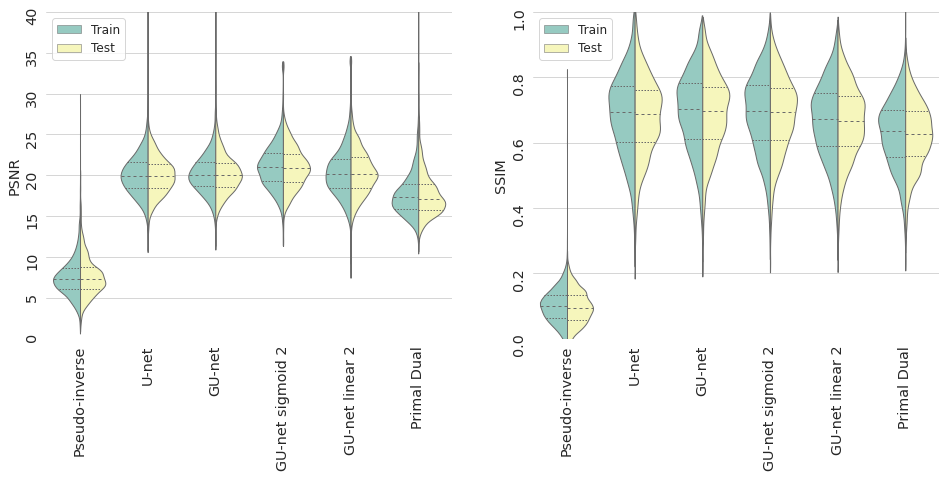

In [16]:
print_statistics(statistics, results, metrics, latex=False)
plot_statistics(statistics, metrics[:2])#, order=["Pseudo-inverse", "Primal Dual", "U-net", "GU-net"])

In [17]:
examples = pickle.load(open(f"./results/{data}/examples.pkl", "rb"))

In [18]:
train_ims = []
test_ims = []
train_titles = []
test_titles = []

for name, mode, im in examples:
    if mode == "Train":
        train_ims.append(im)
        train_titles.append(name)
    else:
        test_ims.append(im)
        test_titles.append(name)

In [19]:
set(statistics.Method)

{'GU-net',
 'GU-net linear 2',
 'GU-net sigmoid 2',
 'Primal Dual',
 'Pseudo-inverse',
 'U-net'}

In [20]:
train_titles[1] = "Pseudo-inverse"

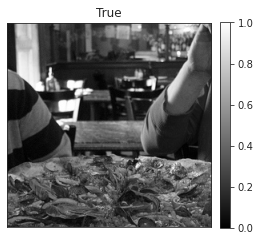

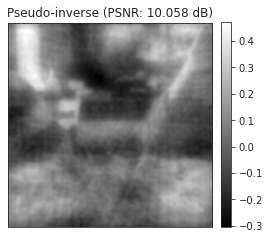

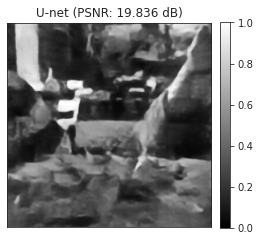

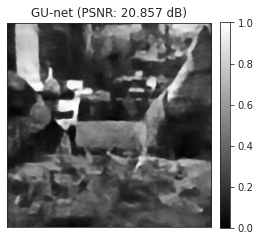

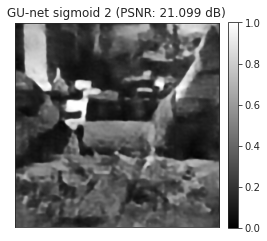

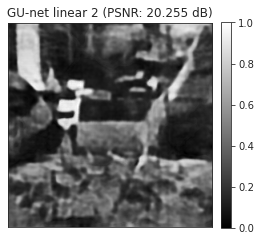

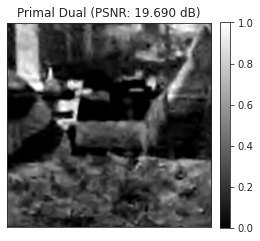

In [28]:
i=3

sns.set_style("white")
ims = [ims[i] for ims in train_ims]
for idx, im in enumerate(ims):
    plt.figure(figsize=(4,4))
    if idx != 1:
        plt.imshow(im, cmap='gray', vmin=0, vmax=1)
    else:
        plt.imshow(im, cmap='gray')
        
    title = train_titles[idx]
    if idx != 0:
        title += f" (PSNR: {peak_signal_noise_ratio(ims[0], im):.3f} dB)"
    plt.title(title) 
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
#     plt.tight_layout()
#     plt.savefig(f"./plots/COCO_{train_titles[idx]}.png")
    plt.show()
# compare(, ncols=2, nrows=3, titles=train_titles, same_scale=True, cmap='gray', colorbar=True)

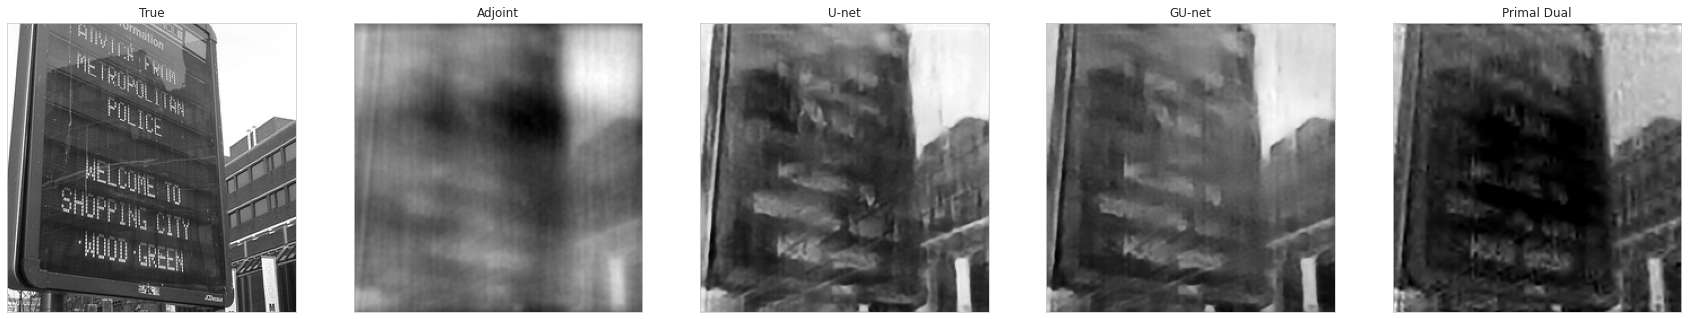

In [77]:
i=0
compare([ims[i] for ims in test_ims], ncols=5, nrows=1, titles=train_titles, same_scale=False, cmap='gray')

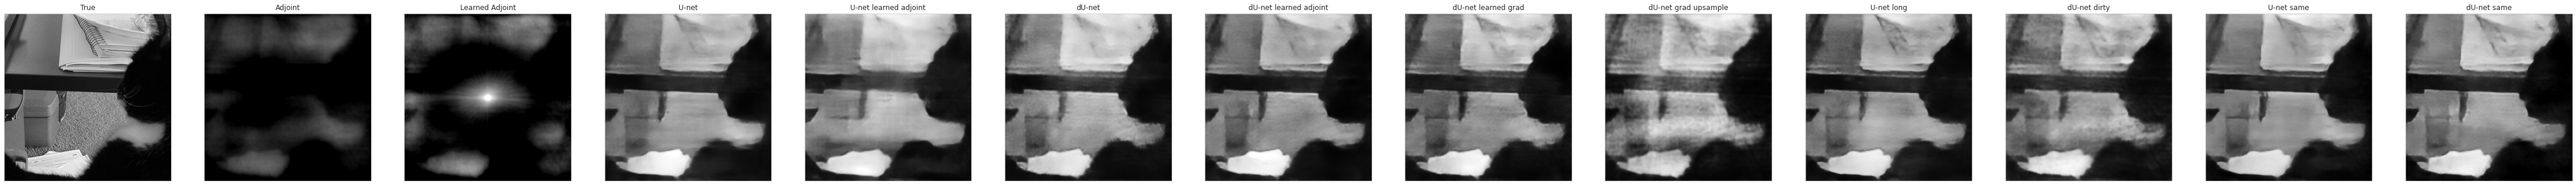

1


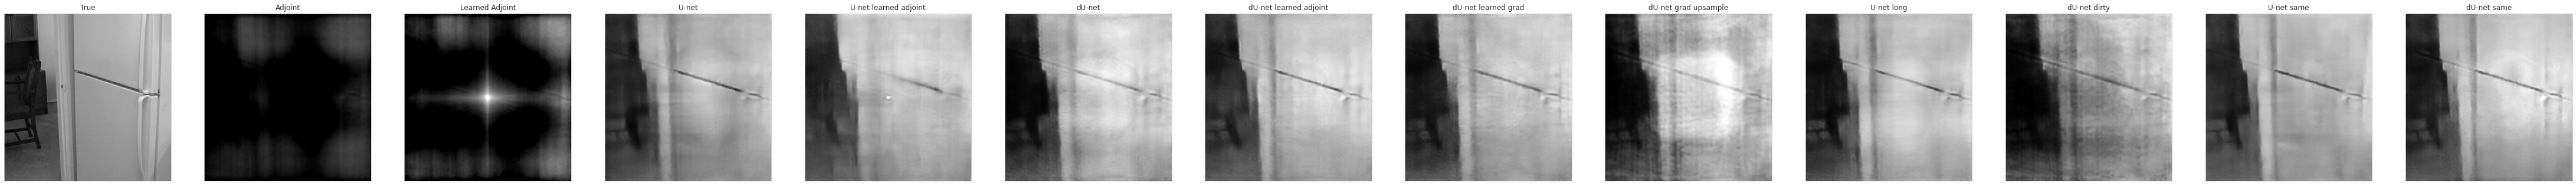

2


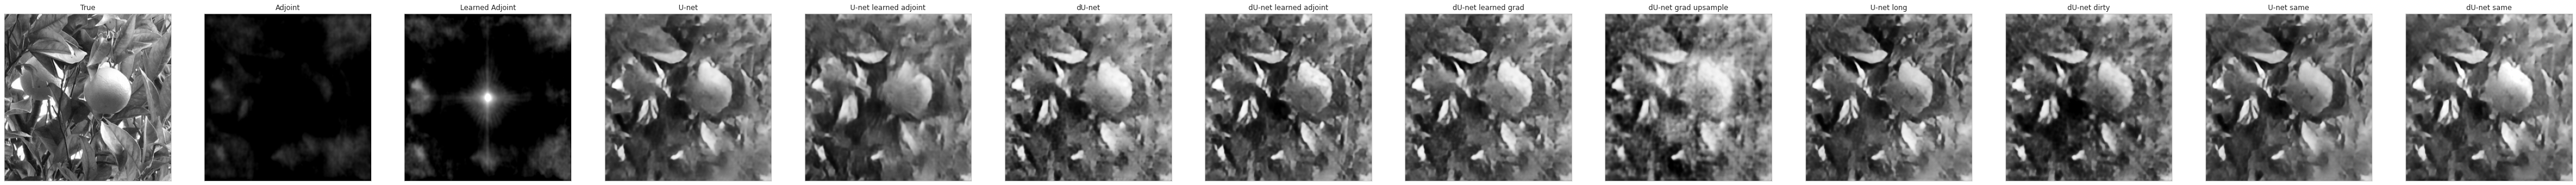

3


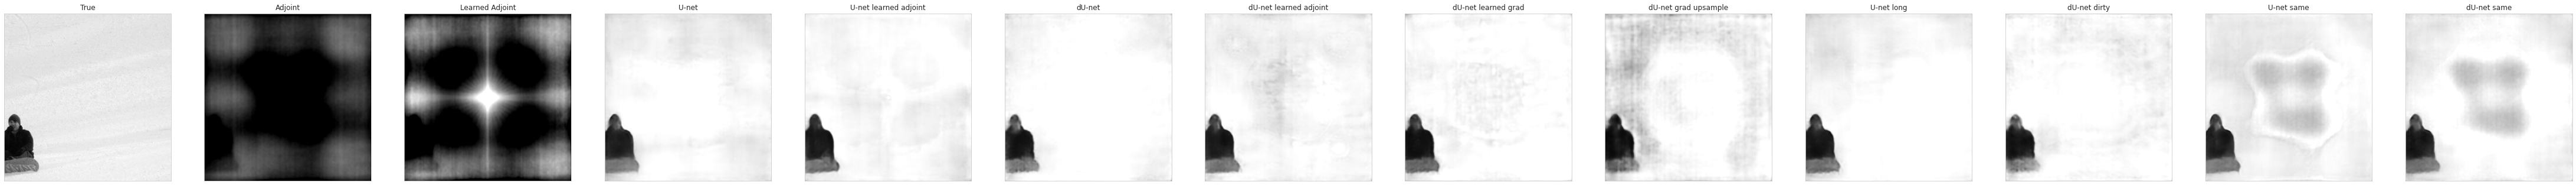

4


In [19]:
for i in range(1,5):
    compare([ims[i] for ims in test_ims], ncols=5, nrows=2, titles=train_titles, same_scale=True)
    print(i)

In [24]:
statistics_robustness = pd.read_csv("COCO_statistics_robustness.csv")
with pd.option_context('mode.use_inf_as_na', True):
    statistics_robustness.dropna(inplace=True)

In [25]:
set(statistics_robustness.Method)

{'Adjoint', 'GU-net', 'GU-net linear 2', 'GU-net sigmoid 2', 'U-net'}

Text(0, 0.5, 'reconstruction SSIM')

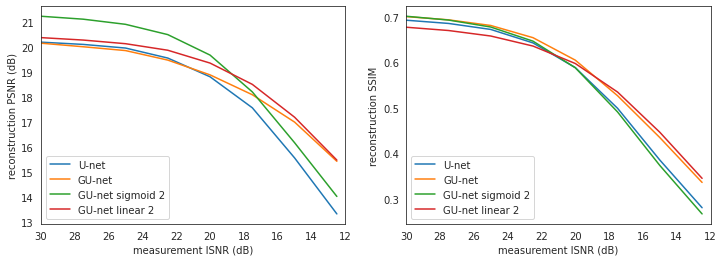

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

# plt.figure(figsize=(12,8))
i = 0
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Test":
        if True:
            sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
            std = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").std()
            
            if len(sub > 0) and name != 'Adjoint':
                ax[0].plot(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values, color=f"C{i}", label = name)
#                 ax[0].fill_between(np.arange(12.5, 32.5, 2.5), sub['PSNR'].values-std['PSNR'].values, sub['PSNR'].values+std['PSNR'].values, color=f"C{i}", alpha=.3)

                ax[1].plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, color=f"C{i}", label = name)
#                 ax[1].fill_between(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values-std['SSIM'].values, sub['SSIM'].values+std['SSIM'].values, color=f"C{i}", alpha=.3)
                i+= 1
                
#                 ax2 = ax[0].twiny()
#                 ax2.axis(xmin=fs.max(), xmax=fs.min())
#                 ax2.set_xticks(fs[::-1])
ax[0].axis(xmin=30, xmax=12)
ax[1].axis(xmin=30, xmax=12)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("measurement ISNR (dB)")
ax[0].set_ylabel("reconstruction PSNR (dB)")
ax[1].set_xlabel("measurement ISNR (dB)")
ax[1].set_ylabel("reconstruction SSIM")

Text(0, 0.5, 'reconstruction SSIM ')

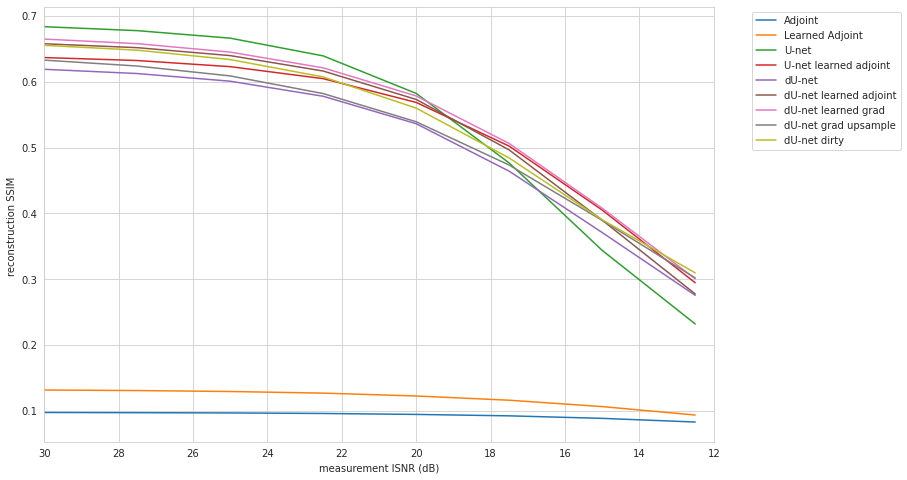

In [24]:
plt.figure(figsize=(12,8))
for name, mode, _ in results:
#     print(name, mode)
    if mode == "Train":
        sub = statistics_robustness[ statistics_robustness["Method"] ==  name].groupby("Noise").mean()
        if len(sub > 0):
            plt.plot(np.arange(12.5, 32.5, 2.5), sub['SSIM'].values, label = name)

plt.axis( xmin=30, xmax=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("measurement ISNR (dB)")
plt.ylabel("reconstruction SSIM ")